In [ ]:
from io import BytesIO
from os.path import basename
from requests import get, post
from shutil import copyfileobj
from time import sleep
from zipfile import ZipFile

# Get an Italian Geopackage of forest reserves in the Canton of Jura.
# To do this, an account is needed, which you can be createt at https://geodienste.ch/register.
# Note also that some cantons require permission to download certain data. These permissions can
# only be requested via the website. Once permissions are granted, downloading using the API will
# be possbile.
auth = ('manuel.aebi@students.fhnw.ch', '5230_Geoinformatik!!')

# Obtain a download token.
response = post(
    url='https://geodienste.ch/downloads/av/export',
    auth=auth,
    params={
        'format': 'gpkg',
        'cantons': ','.join([
            'ZH',
        ]),
        'locale': 'de'
    }
)
response.raise_for_status()
token = response.json()['token']

# Start the export
response = post(
    url=f'https://geodienste.ch/downloads/waldreservate/{token}/export',
    auth=auth
)
response.raise_for_status()

# Wait until completed
download_url = None
while not download_url:
    sleep(10)
    response = get(
        url=f'https://geodienste.ch/downloads/waldreservate/{token}/status.json',
        auth=auth
    )
    response.raise_for_status()
    download_url = response.json()['download_url']

# Download the zip and extract the gpkg
response = get(
    download_url,
    auth=auth
)
response.raise_for_status()
with ZipFile(BytesIO(response.content)) as file:
    for info in file.infolist():
        if info.filename.lower().endswith('.gpkg'):
            with file.open(info) as source, open(basename(info.filename), 'wb') as target:
                copyfileobj(source, target)

In [2]:
import geopandas as gpd

In [4]:

Gem_df = gpd.read_file(
    "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/03_GitHub/data/swissBOUNDARIES3D_1_5_LV95_LN02.gpkg", layer = "tlm_hoheitsgebiet")

print(Gem_df.head())

                                     uuid datum_aenderung datum_erstellung  \
0  {5D7E5812-120E-491A-BFCD-CCED809316F4}      2024-10-18       2008-11-24   
1  {72947F82-8AB3-4334-AFC5-08B4FB50FEFC}      2024-10-18       2008-11-24   
2  {D0755E75-03C7-4185-B46C-26A6C46239BB}      2024-10-21       2008-11-24   
3  {993CEB7E-AF34-4056-916D-B4D5D3233716}      2024-10-18       2008-11-24   
4  {F1F1C98A-F1FF-4A05-9EF3-9B07C13D0F06}      2024-10-18       2008-11-24   

   erstellung_jahr  erstellung_monat grund_aenderung   herkunft  \
0             1997                 1      Verbessert  swisstopo   
1             2000                 1      Verbessert  swisstopo   
2             2006                 1      Verbessert  swisstopo   
3             2000                 1      Verbessert  swisstopo   
4             1997                 1      Verbessert  swisstopo   

   herkunft_jahr  herkunft_monat  revision_jahr  ...  bezirksnummer  \
0           2025               1           2025  ...     

In [5]:
Gem_df_CH = Gem_df[Gem_df['icc'] == 'CH']

print(Gem_df_CH.head())

                                     uuid datum_aenderung datum_erstellung  \
0  {5D7E5812-120E-491A-BFCD-CCED809316F4}      2024-10-18       2008-11-24   
1  {72947F82-8AB3-4334-AFC5-08B4FB50FEFC}      2024-10-18       2008-11-24   
2  {D0755E75-03C7-4185-B46C-26A6C46239BB}      2024-10-21       2008-11-24   
3  {993CEB7E-AF34-4056-916D-B4D5D3233716}      2024-10-18       2008-11-24   
4  {F1F1C98A-F1FF-4A05-9EF3-9B07C13D0F06}      2024-10-18       2008-11-24   

   erstellung_jahr  erstellung_monat grund_aenderung   herkunft  \
0             1997                 1      Verbessert  swisstopo   
1             2000                 1      Verbessert  swisstopo   
2             2006                 1      Verbessert  swisstopo   
3             2000                 1      Verbessert  swisstopo   
4             1997                 1      Verbessert  swisstopo   

   herkunft_jahr  herkunft_monat  revision_jahr  ...  bezirksnummer  \
0           2025               1           2025  ...     

In [6]:
BB_df = gpd.read_file("C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/05_Daten/BB_CH_Gesamt.gpkg")

print(BB_df.head())

  BFSNr Qualitaet                      Art GWR_EGID Kanton layer  \
0  6613      AV93             Gartenanlage     None     GE  lcsf   
1  6613      AV93                 Trottoir     None     GE  lcsf   
2  6613      AV93                 Trottoir     None     GE  lcsf   
3  6613      AV93   uebrige_Intensivkultur     None     GE  lcsf   
4  6613      AV93  uebrige_vegetationslose     None     GE  lcsf   

                                                path  \
0  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
1  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
2  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
3  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
4  C:/Users/aebim/Documents/02_Ausbildung/Studium...   

                                            geometry  
0  MULTIPOLYGON (((2503797.56 1116264.339, 250380...  
1  MULTIPOLYGON (((2503804.27 1116259.719, 250380...  
2  MULTIPOLYGON (((2503730.247 1116297.118, 25037...  
3  MULTIPOLYGON (((2503491.547 111

In [7]:
BB_df_Vs = BB_df[BB_df['Kanton'] == 'VS']
print(BB_df_Vs.head())

       BFSNr Qualitaet                 Art   GWR_EGID Kanton layer  \
875150  6156      AV93            Gebaeude     929034     VS  lcsf   
875153  6153      AV93            Gebaeude  504216988     VS  lcsf   
875167  6156      AV93  uebrige_befestigte       None     VS  lcsf   
875168  6213      AV93            Gebaeude     936195     VS  lcsf   
875169  6213      AV93  uebrige_befestigte       None     VS  lcsf   

                                                     path  \
875150  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
875153  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
875167  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
875168  C:/Users/aebim/Documents/02_Ausbildung/Studium...   
875169  C:/Users/aebim/Documents/02_Ausbildung/Studium...   

                                                 geometry  
875150  MULTIPOLYGON (((2555542.76 1120750.08, 2555546...  
875153  MULTIPOLYGON (((2563998.987 1122515.36, 256401...  
875167  MULTIPOLYGON (((2555542.

In [ ]:
differenz = gpd.overlay(Gem_df_CH, BB_df_Vs, how="difference")
print("Schnittflächen mit Overlay berechnet erfolgreich.")

C:\Users\aebim\AppData\Local\Temp\ipykernel_48408\2691254159.py:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


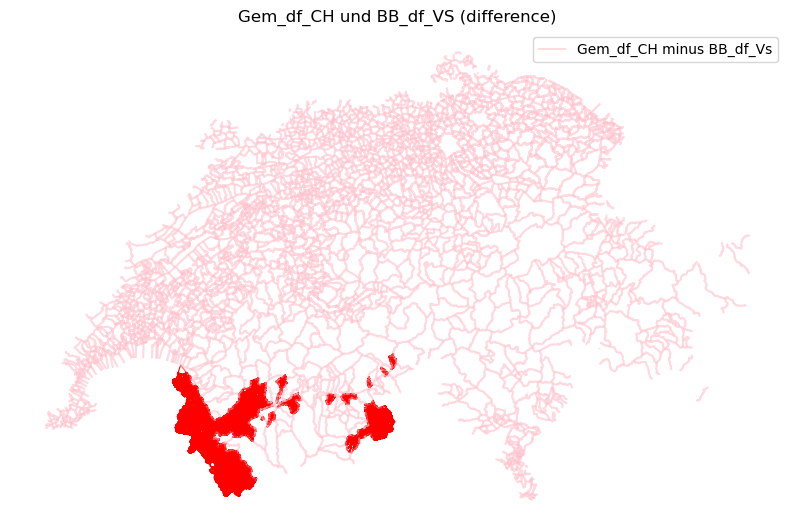

In [ ]:
# ...existing code...
import matplotlib.pyplot as plt

# ensure same CRS
if Gem_df_CH.crs != BB_df_Vs.crs:
    BB_df_Vs = BB_df_Vs.to_crs(Gem_df_CH.crs)

fig, ax = plt.subplots(figsize=(10, 10))

differenz.plot(ax=ax, color='pink', edgecolor='none', alpha=0.6, label='Gem_df_CH minus BB_df_Vs')
BB_df_Vs.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.8, label='BB_df_Vs')

ax.legend()
ax.set_title('Gem_df_CH und BB_df_VS (difference)')
ax.set_axis_off()
plt.show()
# ...existing code...

In [10]:
differenz.to_file(
    "C:/Users/aebim/Documents/02_Ausbildung/Studium/05_Semester/5230_Geoniformatik_Raumanalyse/Projektarbeit/03_GitHub/data/preprocessing/av/04_Vollstaendigkeit/keine_BB.gpkg",
    driver="GPKG")

In [20]:
# 1️⃣ Fläche jedes CH-Polygons berechnen
Gem_df_CH["area_total"] = Gem_df_CH.geometry.area

# 2️⃣ Vereinige alle BB-Geometrien zu einem Polygon
BB_union = BB_df_Vs.unary_union

# 3️⃣ Berechne die überlappende Fläche jedes CH-Polygons mit BB
Gem_df_CH["area_overlap"] = Gem_df_CH.geometry.intersection(BB_union).area

# 4️⃣ Berechne den prozentualen Überlappungsanteil
Gem_df_CH["overlap_ratio"] = Gem_df_CH["area_overlap"] / Gem_df_CH["area_total"]

# 5️⃣ Filter: Nur Polygone mit weniger als 95 % Überlappung behalten
subset_df = Gem_df_CH[Gem_df_CH["overlap_ratio"] < 0.95].copy()

# 6️⃣ Berechne die tatsächliche Differenzgeometrie (nur der Teil außerhalb von BB)
diff_df = gpd.overlay(subset_df, BB_df_Vs, how="difference")

# 7️⃣ Optional: Aufräumen – nur gültige, nicht-leere Geometrien behalten
diff_df = diff_df[diff_df.is_valid & ~diff_df.geometry.is_empty].copy()

# 8️⃣ (Optional) Die Overlap-Ratio aus subset_df übernehmen, falls du sie im Ergebnis sehen willst
diff_df = diff_df.merge(
    subset_df[["overlap_ratio"]], 
    left_index=True, 
    right_index=True, 
    how="left"
)

C:\Users\aebim\AppData\Local\Temp\ipykernel_48408\1113641758.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  BB_union = BB_df_Vs.unary_union


IndexError: single positional indexer is out-of-bounds

In [ ]:
gem_df_CH_ohne_BB = Gem_df_CH[Gem_df_CH["cover_percent"] < 95]

In [19]:
print("Anzahl der Gemeinden ohne ausreichende BB-Abdeckung:", len(gem_df_CH_ohne_BB))
print(intersection.head())

Anzahl der Gemeinden ohne ausreichende BB-Abdeckung: 0
                                     uuid datum_aenderung datum_erstellung  \
0  {5468C88C-9C27-4952-B4D8-CDCCCD5E50E7}      2024-10-24       2022-11-08   
1  {5468C88C-9C27-4952-B4D8-CDCCCD5E50E7}      2024-10-24       2022-11-08   
2  {5468C88C-9C27-4952-B4D8-CDCCCD5E50E7}      2024-10-24       2022-11-08   
3  {5468C88C-9C27-4952-B4D8-CDCCCD5E50E7}      2024-10-24       2022-11-08   
4  {5468C88C-9C27-4952-B4D8-CDCCCD5E50E7}      2024-10-24       2022-11-08   

   erstellung_jahr  erstellung_monat grund_aenderung   herkunft  \
0             2023                 1      Verbessert  swisstopo   
1             2023                 1      Verbessert  swisstopo   
2             2023                 1      Verbessert  swisstopo   
3             2023                 1      Verbessert  swisstopo   
4             2023                 1      Verbessert  swisstopo   

   herkunft_jahr  herkunft_monat  revision_jahr  ...  inter_area_y BFSNr 

C:\Users\aebim\AppData\Local\Temp\ipykernel_48408\3180601390.py:3: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gem_df_CH_ohne_BB.plot(ax=ax, color='red', edgecolor='none', alpha=0.6, label='gem_df_CH_ohne_BB')


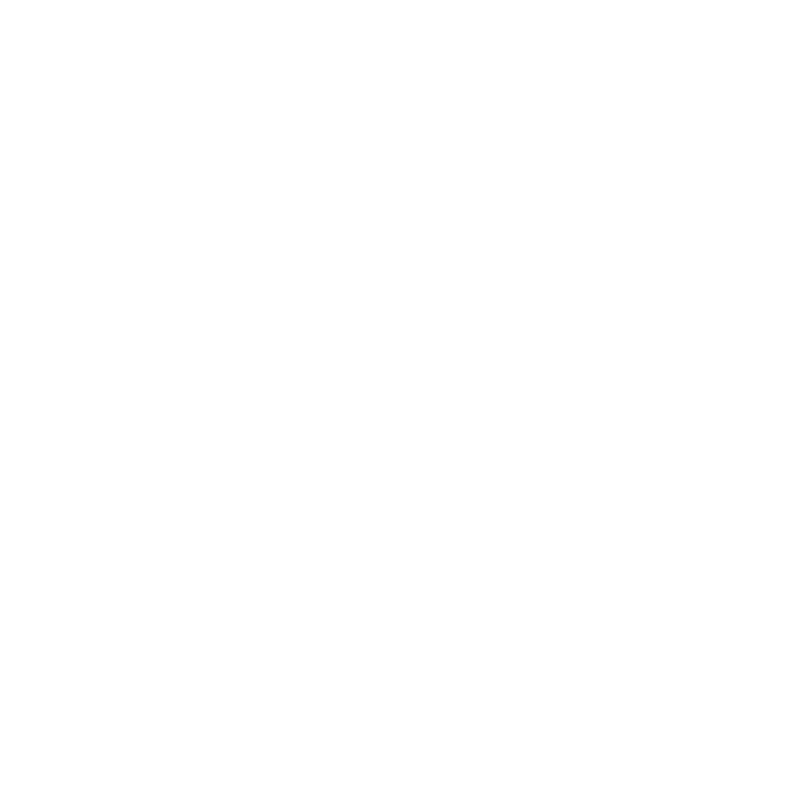

In [16]:

fig, ax = plt.subplots(figsize=(10, 10))

gem_df_CH_ohne_BB.plot(ax=ax, color='red', edgecolor='none', alpha=0.6, label='gem_df_CH_ohne_BB')

ax.set_axis_off()
plt.show()

In [ ]:
# ...existing code...

# show field names
print("Gem_df_CH columns:", Gem_df_CH.columns.tolist())
print("BB_df_Vs  columns:", BB_df_Vs.columns.tolist())


Gem_df_CH columns: ['uuid', 'datum_aenderung', 'datum_erstellung', 'erstellung_jahr', 'erstellung_monat', 'grund_aenderung', 'herkunft', 'herkunft_jahr', 'herkunft_monat', 'revision_jahr', 'revision_monat', 'revision_qualitaet', 'objektart', 'icc', 'typ', 'geometry']
BB_df_Vs  columns: ['BFSNr', 'Qualitaet', 'Art', 'GWR_EGID', 'Kanton', 'layer', 'path', 'geometry']
